In [1]:
import cv2
import matplotlib.pyplot as plt
# import tensorflow as tf
import numpy as np
import imutils
import easyocr

# Read in Image, Grayscale and Blur

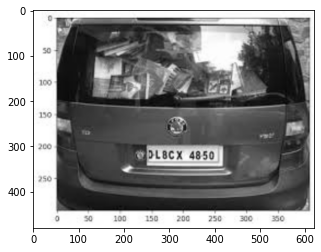

In [24]:
img = cv2.imread("cars//car26.jpg")
img = cv2.resize(img, (620, 480))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

# Apply filter and find edges for localization

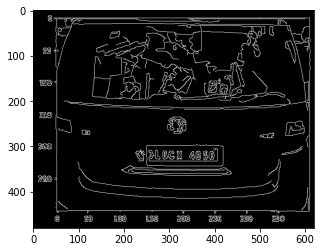

In [25]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
# plt.imshow(edged)

# Find Contours and Apply Mask

In [26]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [27]:
location = 0
for c in contours:
    approx = cv2.approxPolyDP(c, 6, True) 
    if len(approx) == 4:
        location = approx
        break

In [28]:
location

array([[[419, 300]],

       [[251, 298]],

       [[251, 342]],

       [[416, 343]]], dtype=int32)

In [29]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

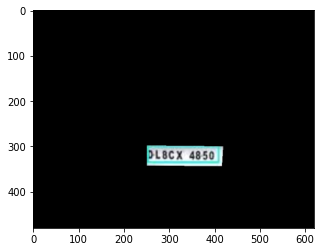

In [30]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))


In [31]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

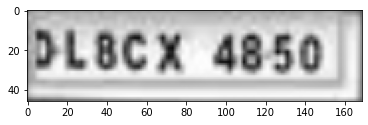

In [32]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

#  Use Easy OCR/pytesseract for Text Extraction

In [33]:
read= easyocr.Reader(['en'])
result = read.readtext(cropped_image)
result


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 2], [157, 2], [157, 39], [0, 39]], 'JLBcX 4850]', 0.24971477104771111)]

#  Plot the result

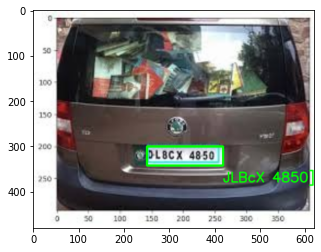

In [34]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+80), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))